In [1]:
import os
import keras

import numpy as np

from keras import models, layers
from keras import optimizers
from keras.datasets import imdb

Using TensorFlow backend.


In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(path=os.getcwd()+'/imdb.npz', num_words=10000)

In [3]:
def vectorize(seqs, dim=10000):
    ret = np.zeros((len(seqs), dim))
    for i, seq in enumerate(seqs):
        ret[i, seq] = 1
    return ret

x_train = vectorize(train_data)
x_test = vectorize(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


batch_size = 128
num_classes = 10
epochs = 20

## Original Model

In [4]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.001),
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_val, y_val))

W0916 09:23:32.504304 140736253780864 deprecation_wrapper.py:119] From /Users/django/.pyenv/Versions/3.6.8/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0916 09:23:32.541064 140736253780864 deprecation_wrapper.py:119] From /Users/django/.pyenv/Versions/3.6.8/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0916 09:23:32.553480 140736253780864 deprecation_wrapper.py:119] From /Users/django/.pyenv/Versions/3.6.8/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0916 09:23:32.647280 140736253780864 deprecation_wrapper.py:119] From /Users/django/.pyenv/Versions/3.6.8/lib/python3.6/site-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 319us/step - loss: 0.3990 - acc: 0.8351 - val_loss: 0.2867 - val_acc: 0.8869
Epoch 2/20
15000/15000 [==============================] - 2s 140us/step - loss: 0.2110 - acc: 0.9211 - val_loss: 0.3222 - val_acc: 0.8706
Epoch 3/20
15000/15000 [==============================] - 2s 162us/step - loss: 0.1509 - acc: 0.9457 - val_loss: 0.3180 - val_acc: 0.8789
Epoch 4/20
15000/15000 [==============================] - 2s 155us/step - loss: 0.1118 - acc: 0.9591 - val_loss: 0.3897 - val_acc: 0.8691
Epoch 5/20
15000/15000 [==============================] - 3s 174us/step - loss: 0.0832 - acc: 0.9716 - val_loss: 0.3869 - val_acc: 0.8782
Epoch 6/20
15000/15000 [==============================] - 3s 170us/step - loss: 0.0603 - acc: 0.9793 - val_loss: 0.4335 - val_acc: 0.8766
Epoch 7/20
15000/15000 [==============================] - 3s 190us/step - loss: 0.0414 - acc: 0.9864 - val_loss: 0.5097 - 

In [5]:
history_dict = history.history
m_model_loss = history_dict['val_loss']

## Large Model

In [6]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.001),
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 15s 1ms/step - loss: 0.3929 - acc: 0.8305 - val_loss: 0.2852 - val_acc: 0.8816
Epoch 2/20
15000/15000 [==============================] - 13s 878us/step - loss: 0.1622 - acc: 0.9403 - val_loss: 0.4071 - val_acc: 0.8496
Epoch 3/20
15000/15000 [==============================] - 13s 883us/step - loss: 0.0600 - acc: 0.9808 - val_loss: 0.5114 - val_acc: 0.8826
Epoch 4/20
15000/15000 [==============================] - 13s 854us/step - loss: 0.0223 - acc: 0.9945 - val_loss: 0.7565 - val_acc: 0.8776
Epoch 5/20
15000/15000 [==============================] - 13s 864us/step - loss: 0.0274 - acc: 0.9947 - val_loss: 0.8172 - val_acc: 0.8803
Epoch 6/20
15000/15000 [==============================] - 14s 927us/step - loss: 0.0269 - acc: 0.9964 - val_loss: 0.8231 - val_acc: 0.8779
Epoch 7/20
15000/15000 [==============================] - 16s 1ms/step - loss: 0.0157 - acc: 0.9972 - val_loss: 0.8914

In [7]:
history_dict = history.history
l_model_loss = history_dict['val_loss']

## Small Model

In [12]:
model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.001),
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 207us/step - loss: 0.6156 - acc: 0.7041 - val_loss: 0.5527 - val_acc: 0.8447
Epoch 2/20
15000/15000 [==============================] - 2s 157us/step - loss: 0.4982 - acc: 0.8437 - val_loss: 0.4795 - val_acc: 0.8474
Epoch 3/20
15000/15000 [==============================] - 2s 156us/step - loss: 0.4288 - acc: 0.8935 - val_loss: 0.4504 - val_acc: 0.8522
Epoch 4/20
15000/15000 [==============================] - 2s 166us/step - loss: 0.3797 - acc: 0.9171 - val_loss: 0.4347 - val_acc: 0.8627
Epoch 5/20
15000/15000 [==============================] - 3s 168us/step - loss: 0.3407 - acc: 0.9331 - val_loss: 0.4191 - val_acc: 0.8727
Epoch 6/20
15000/15000 [==============================] - 3s 185us/step - loss: 0.3073 - acc: 0.9457 - val_loss: 0.4079 - val_acc: 0.8735
Epoch 7/20
15000/15000 [==============================] - 3s 172us/step - loss: 0.2789 - acc: 0.9525 - val_loss: 0.4032 - 

In [13]:
history_dict = history.history
s_model_loss = history_dict['val_loss']

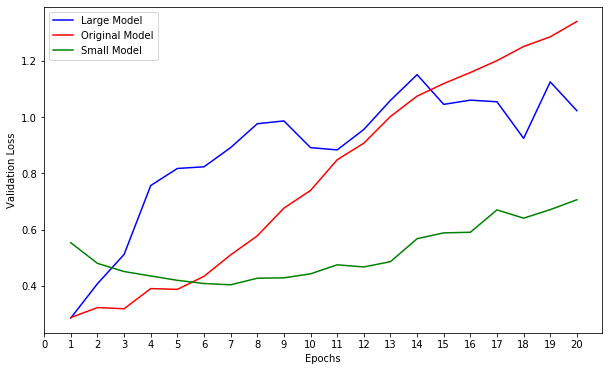

In [14]:
import matplotlib.pyplot as plt

num_epochs = range(1, len(s_model_loss) + 1)

plt.figure(figsize=(10,6))

plt.plot(num_epochs, l_model_loss, 'b', label='Large Model')
plt.plot(num_epochs, m_model_loss, 'r', label='Original Model')
plt.plot(num_epochs, s_model_loss, 'g', label='Small Model')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()

plt.xticks(np.arange(0, 21, step=1))

plt.show()

## 权重正则化

In [25]:
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(16,
                       kernel_regularizer=regularizers.l2(0.001),
                       activation='relu',
                       input_shape=(10000,)))
model.add(layers.Dense(16,
                       kernel_regularizer=regularizers.l2(0.001),
                       activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.001),
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 222us/step - loss: 0.4718 - acc: 0.8199 - val_loss: 0.3944 - val_acc: 0.8498
Epoch 2/20
15000/15000 [==============================] - 2s 109us/step - loss: 0.2827 - acc: 0.9118 - val_loss: 0.3272 - val_acc: 0.8848
Epoch 3/20
15000/15000 [==============================] - 1s 89us/step - loss: 0.2423 - acc: 0.9269 - val_loss: 0.3421 - val_acc: 0.8782
Epoch 4/20
15000/15000 [==============================] - 1s 91us/step - loss: 0.2209 - acc: 0.9369 - val_loss: 0.3580 - val_acc: 0.8799
Epoch 5/20
15000/15000 [==============================] - 1s 94us/step - loss: 0.2124 - acc: 0.9416 - val_loss: 0.3731 - val_acc: 0.8687
Epoch 6/20
15000/15000 [==============================] - 2s 100us/step - loss: 0.2004 - acc: 0.9451 - val_loss: 0.3917 - val_acc: 0.8668
Epoch 7/20
15000/15000 [==============================] - 1s 96us/step - loss: 0.1917 - acc: 0.9475 - val_loss: 0.3852 - val_

In [26]:
history_dict = history.history
l2_model_loss = history_dict['val_loss']

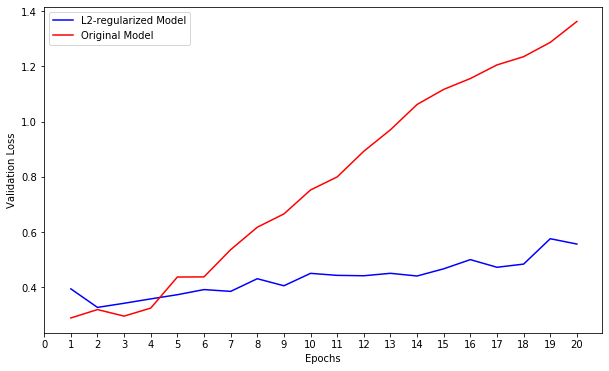

In [48]:
plt.figure(figsize=(10,6))

plt.plot(num_epochs, l2_model_loss, 'b', label='L2-regularized Model')
plt.plot(num_epochs, m_model_loss, 'r', label='Original Model')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()

plt.xticks(np.arange(0, 21, step=1))

plt.show()

## Dropout

In [46]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.001),
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 267us/step - loss: 0.5691 - acc: 0.6985 - val_loss: 0.3951 - val_acc: 0.8701
Epoch 2/20
15000/15000 [==============================] - 2s 107us/step - loss: 0.3984 - acc: 0.8417 - val_loss: 0.3155 - val_acc: 0.8790
Epoch 3/20
15000/15000 [==============================] - 1s 89us/step - loss: 0.3202 - acc: 0.8864 - val_loss: 0.2827 - val_acc: 0.8905
Epoch 4/20
15000/15000 [==============================] - 1s 89us/step - loss: 0.2710 - acc: 0.9086 - val_loss: 0.2835 - val_acc: 0.8904
Epoch 5/20
15000/15000 [==============================] - 1s 91us/step - loss: 0.2383 - acc: 0.9178 - val_loss: 0.3016 - val_acc: 0.8914
Epoch 6/20
15000/15000 [==============================] - 1s 91us/step - loss: 0.2147 - acc: 0.9291 - val_loss: 0.3183 - val_acc: 0.8865
Epoch 7/20
15000/15000 [==============================] - 1s 91us/step - loss: 0.2050 - acc: 0.9335 - val_loss: 0.3457 - val_a

In [49]:
history_dict = history.history
dropout_model_loss = history_dict['val_loss']

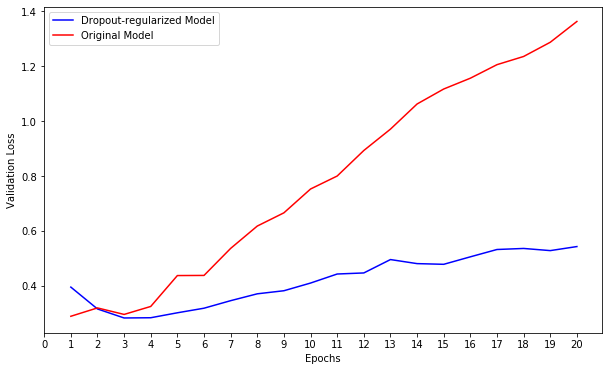

In [50]:
plt.figure(figsize=(10,6))

plt.plot(num_epochs, dropout_model_loss, 'b', label='Dropout-regularized Model')
plt.plot(num_epochs, m_model_loss, 'r', label='Original Model')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()

plt.xticks(np.arange(0, 21, step=1))

plt.show()